In [1]:
from numpy import genfromtxt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data exploring for heuristic decision


## Best $\epsilon$ for the Manhattan Distance

To calculate the best $\epsilon$ for the Manhattan Distance we will have to take in to account two measures, first the execution time needed to find a solution and then the cost of that solution. So, lets start by calculating the execution time for an $\epsilon$ between 0.1 and 5.1 in stemps os 0.1.

### Execution times for different $\epsilon$ values

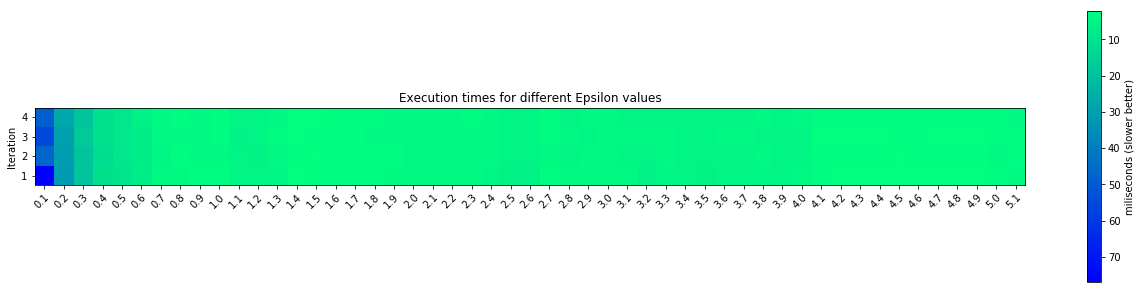

In [2]:
data = genfromtxt('https://raw.githubusercontent.com/thewilly/GIISOF01-4-008-Sistemas-Inteligentes/master/busqueda-heuristica/manhatan-times-epsilon.csv', delimiter=',')
headers = data[0]
times = [1, 2, 3, 4]
data_raw = data[1:]

fig, ax = plt.subplots(sharey=True,figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
im = ax.imshow(data_raw, cmap='winter_r')
# We want to show all ticks...
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(times)))

# ... and label them with the respective list entries
ax.set_xticklabels(headers)
ax.set_yticklabels(times)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
divider = make_axes_locatable(ax)

cb = fig.colorbar(im, ax=ax)
cb.set_label('miliseconds (slower better)')
cb.ax.invert_yaxis() 

ax.set_title("Execution times for different Epsilon values")
ax.set_ylabel("Iteration")

# Inverting the y axis
plt.gca().invert_yaxis()

# Drawing the plot
plt.show()

As we can see in the previous graph the execution time (green lower and blue higher) starts reducing at 0.1 and stops at 1.5 (from that point on remain constant). So lets zoom that area so we can see beter the execution times.

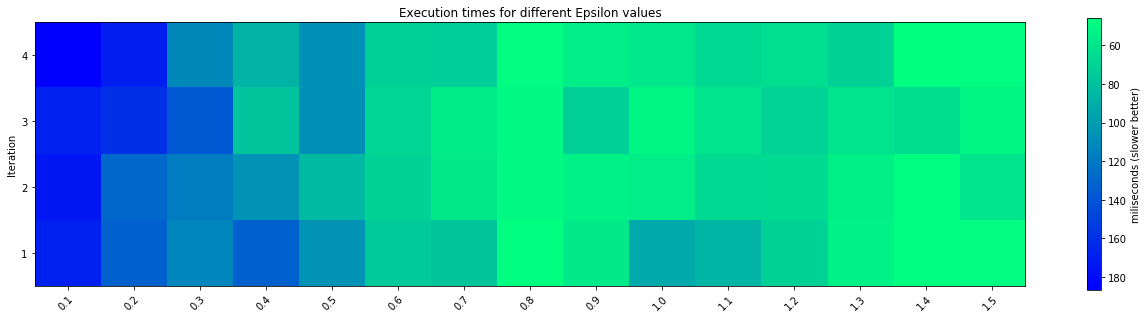

In [3]:
data = genfromtxt('https://raw.githubusercontent.com/thewilly/GIISOF01-4-008-Sistemas-Inteligentes/master/busqueda-heuristica/heuristico-times.csv', delimiter=',')
headers = data[0]
times = [1, 2, 3, 4]
data_raw = data[1:]

fig, ax = plt.subplots(sharey=True,figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
im = ax.imshow(data_raw, cmap='winter_r')
# We want to show all ticks...
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(times)))

# ... and label them with the respective list entries
ax.set_xticklabels(headers)
ax.set_yticklabels(times)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
divider = make_axes_locatable(ax)

cb = fig.colorbar(im, ax=ax)
cb.set_label('miliseconds (slower better)')

ax.set_title("Execution times for different Epsilon values")
ax.set_ylabel("Iteration")
cb.ax.invert_yaxis() 

# Inverting the y axis
plt.gca().invert_yaxis()

# Drawing the plot
plt.show()

So, from the previous graph we can say that 0.8 is the perfect value to fix our epsilon, lets try to confirm thisa with the path costs.


### Path costs for different $\epsilon$ values

Now that we have a hint of were more or less our $\epsilon$ is located we will try the range [0.1 - 1.5] against the path costs.

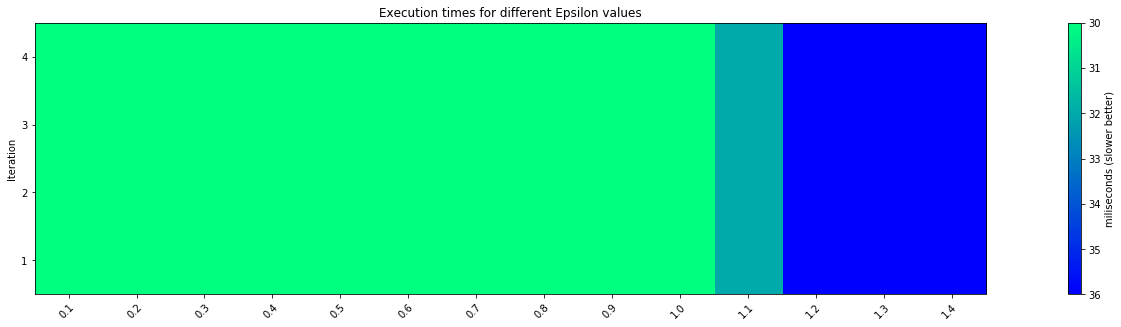

In [4]:
data = genfromtxt('https://raw.githubusercontent.com/thewilly/GIISOF01-4-008-Sistemas-Inteligentes/master/busqueda-heuristica/path-costs-epsilon.csv', delimiter=',')
headers = data[0]
times = [1, 2, 3, 4]
data_raw = data[1:]

fig, ax = plt.subplots(sharey=True,figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
im = ax.imshow(data_raw, cmap='winter_r')
# We want to show all ticks...
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(times)))

# ... and label them with the respective list entries
ax.set_xticklabels(headers)
ax.set_yticklabels(times)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
divider = make_axes_locatable(ax)

cb = fig.colorbar(im, ax=ax)
cb.set_label('miliseconds (slower better)')
cb.ax.invert_yaxis() 

ax.set_title("Execution times for different Epsilon values")
ax.set_ylabel("Iteration")

# Inverting the y axis
plt.gca().invert_yaxis()

# Drawing the plot
plt.show()




From the previous graph we can see that for an instance of the problem with cost 30 the optimal cost is achieved with an $\epsilon$ between [0.1 - 1.0]. Then, as 0.8 is in this range and was our fastest $\epsilon$ we can say that the best $\epsilon$ in terms of speed and path cost eficiency is 0.8.


## h4 
In order to find a valid heuristic we will propose a formula for exploring the posibilities of the heuristic. Based on h1 and linear calculus we will propose a linear regressión formula with a correction factor. So, our hipothesis is that the heuristic can be: $(\epsilon + 1)*h2 + \delta$. Where $\epsilon$ is the factor to multiply by $h2$ and $\delta$ will be the correction factor. Lets find the ideal values of $\epsilon$ and $\delta$.


### Computing the best $\epsilon$ and $\delta$

The results of the calculations for the diffetent $\epsilon$ values are stored at https://raw.githubusercontent.com/thewilly/GIISOF01-4-008-Sistemas-Inteligentes/master/busqueda-heuristica/heuristico-times.csv and available for download.

Lets plot the results obtained:

## Final formula will be $(0.8 + 1)*h2 + \delta$ with delta = [1.3, ..., 1.4]